### Sampling

#### DataSet
The data set is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017), where you can also find useful documentation for the data set.
DataSet [Source](https://www.wnba.com/stats/player-stats/#?Season=2017&SeasonType=Regular%20Season&PerMode=Totals)


#### Data Introduction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv('./datasets/wnba.csv')
wnba.head(5)
wnba.tail(5)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [3]:
wnba.shape

(143, 32)

In [4]:
print(wnba.columns)

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')


#### Sampling Error
A metric specific to a population is called a **parameter**, while one specific to a sample is called a **statistic**. The concept of the sampling error is the difference between a parameter and a statistic:

**sampling error = parameter − statistic**

In [5]:
# Find the maximum number of games played by a player in the season 2016-1017
parameter = wnba['Games Played'].max()
print('[parameter] - ', parameter)

# Sample randomly 30 players from the population, use the the argument random_state = 1. 
# This makes your results reproducible
sample = wnba['Games Played'].sample(30, random_state=1)
statistic = sample.max()
print('[statistic] - ', statistic)

sampling_error = parameter - statistic
print('[sampling_error] - ', sampling_error)

[parameter] -  32
[statistic] -  30
[sampling_error] -  2


#### Simple Random Sampling
* Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop.
* Display the discrepancy between the parameter of interest (the mean of the PTS(TotalPoints) column) and the statistics obtained.

64      12
8      395
139     28
9       36
57     127
133    240
16      31
56       9
51     336
46     317
Name: PTS, dtype: int64


[SAMPLE-MEANS] [145.1, 185.4, 140.4, 293.7, 172.7, 124.9, 187.8, 157.0, 188.9, 282.0]


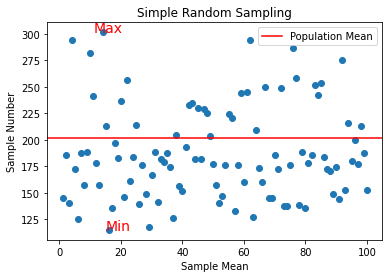

In [6]:
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

print(sample)
print('\n') 
print('[SAMPLE-MEANS]',sample_means[0:10])

fig, ax = plt.subplots()
ax.scatter(range(1,101), sample_means) 

ax.set_xlabel('Sample Mean')
ax.set_ylabel('Sample Number')
ax.set_title('Simple Random Sampling')


# Draw a horizontal line that represents the average number of points for the population
plt.axhline(population_mean, label='Population Mean', color='red')
plt.legend(loc ='upper right') 
plt.text(11, 301.4, 'Max', color='red', fontsize=14)
plt.text(15, 115, 'Min', color='red', fontsize=14)
plt.show()

#### Visualizing Discrepancy between a parameter and its corresponding statistics
We can easily see how sample means tend to vary less and less around the population mean as we increase the sample size. From this observation we can make two conclusions:

* Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
* When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

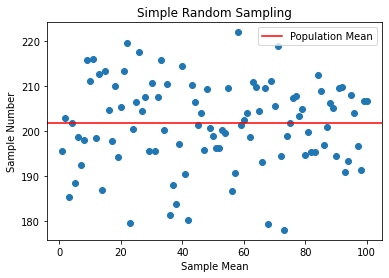

In [7]:
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100): 
    sample = wnba['PTS'].sample(100, random_state=i)
    sample_means.append(sample.mean())

fig, ax = plt.subplots()
ax.scatter(range(1,101), sample_means) 

ax.set_xlabel('Sample Mean')
ax.set_ylabel('Sample Number')
ax.set_title('Simple Random Sampling')


# Draw a horizontal line that represents the average number of points for the population
plt.axhline(population_mean, label='Population Mean', color='red')
plt.legend(loc ='upper right') 
plt.show()

#### Stratified Sampling
* Stratify the data set by player position, and then do simple random sampling on every stratum.
* Use the sample to find which position has the greatest number of points per game.

In [8]:
# Create a new column which describes the number of points a player scored per game during the season.
wnba['Points_Per_Game'] = wnba['PTS'] / wnba['Games Played']

# Stratify the wnba data set by player position. The Pos column describes a player's position on the field. 
# Assign each stratum to a different variable.
G_stratum = wnba[wnba.Pos == 'G']
F_stratum = wnba[wnba.Pos == 'F']
C_stratum = wnba[wnba.Pos == 'C']
GF_stratum = wnba[wnba.Pos == 'G/F']
FC_stratum = wnba[wnba.Pos == 'F/C']

points_per_position = {}

for stratum, position in [ (G_stratum, 'G'),
  (F_stratum, 'F'),
  (C_stratum, 'C'),
  (GF_stratum, 'GF'),
  (FC_stratum, 'FC')
]:
    # Sample 10 observations using simple random sampling
    sample = stratum['Points_Per_Game'].sample(10, random_state = 0)
    points_per_position[position] = round(sample.mean(), 2)

print(points_per_position)

# Find the position that has the greatest number of points per game, and assign its name to a variable named position_most_points.
position_most_points = max(points_per_position, key=points_per_position.get)

print(position_most_points)

{'G': 7.09, 'F': 8.7, 'C': 9.83, 'GF': 6.82, 'FC': 9.06}
C


#### Relation between the Total Points & No. of Games Played

In [9]:

print('Min Games Played - ',wnba['Games Played'].min())
print('Max Games Played - ',wnba['Games Played'].max())

print('\n')
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

Min Games Played -  2
Max Games Played -  32


(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


**OBSERVATIONS**
* Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games.

* As a side note on the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval is not included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].
* We can see that from a population of 20 individuals:

    * 14 individuals played more than 22 games.
    * 4 individuals played between 13 and 22 games.
    * 2 individuals played below 13 games.

* Transforming these figures to percentages, 70% of the individuals played more than 22 games, 20% played between 13 and 22 games, and 10% played below 13 games. Because we sampled proportionally, the same percentages (70%, 20%, 10%) are preserved in the sample (even though the absolute values are different): 70% played more than 22 games, 20% played between 13 and 22 games, and 10% played below 13 games.

#### Propotional Stratified Sampling

[185.9, 163.6, 176.0, 305.1, 241.1, 200.1, 272.5, 170.5, 190.5, 138.4]


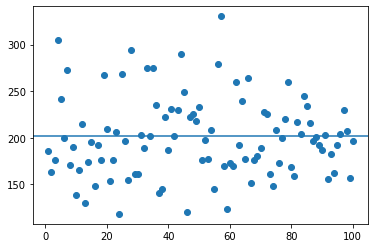

In [10]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[ (wnba['Games Played'] > 12) & (wnba['Games Played'] <=22) ]
over_23 = wnba[wnba['Games Played'] > 22]

propotional_sampling_means = []

for i in range(100):
# Sample each stratum proportionally. Sample at random: one sample          observation from the first stratum, two sample observations from          the second, and seven sample observations from the third stratum
    under_12_sample = under_12['PTS'].sample(1, random_state = i)
    btw_13_22_sample = btw_13_22['PTS'].sample(2, random_state = i) 
    over_23_sample = over_23['PTS'].sample(7, random_state = i)

    final_sample = pd.concat([under_12_sample, btw_13_22_sample, over_23_sample])   
    
    propotional_sampling_means.append(final_sample.mean())

print(propotional_sampling_means[0:10])

plt.scatter(range(1, 101), propotional_sampling_means)
plt.axhline(wnba['PTS'].mean())

### Cluster Sampling
We'd first list all the possible data sources. Assuming that all the teams in our data set have a website where we can take data from, we end up with this list of clusters (each team's website is considered a cluster) 

In [11]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Sampling four clusters randomly

In [12]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state=0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


In [15]:
# Pick random 4 clusters
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state=0)

# Collect the data from each cluster without sampling the clusters
sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team']==cluster]
    sample = sample.append(data_collected)

# Use the data collected to estimate the mean for the following player attributes:
    # Height;
    # Age;
    # BMI;
    # Total points.
# measure the sampling error of your estimates
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()   
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

print('Height_Error: ',sampling_error_height, 'Age_Error: ', sampling_error_age, 'sampling_error_BMI: ', sampling_error_BMI, 'sampling_error_points: ', sampling_error_points)

Height_Error:  -0.06400121617511445 Age_Error:  -1.401337792642142 sampling_error_BMI:  0.23095444165951662 sampling_error_points:  -27.79674673152934
